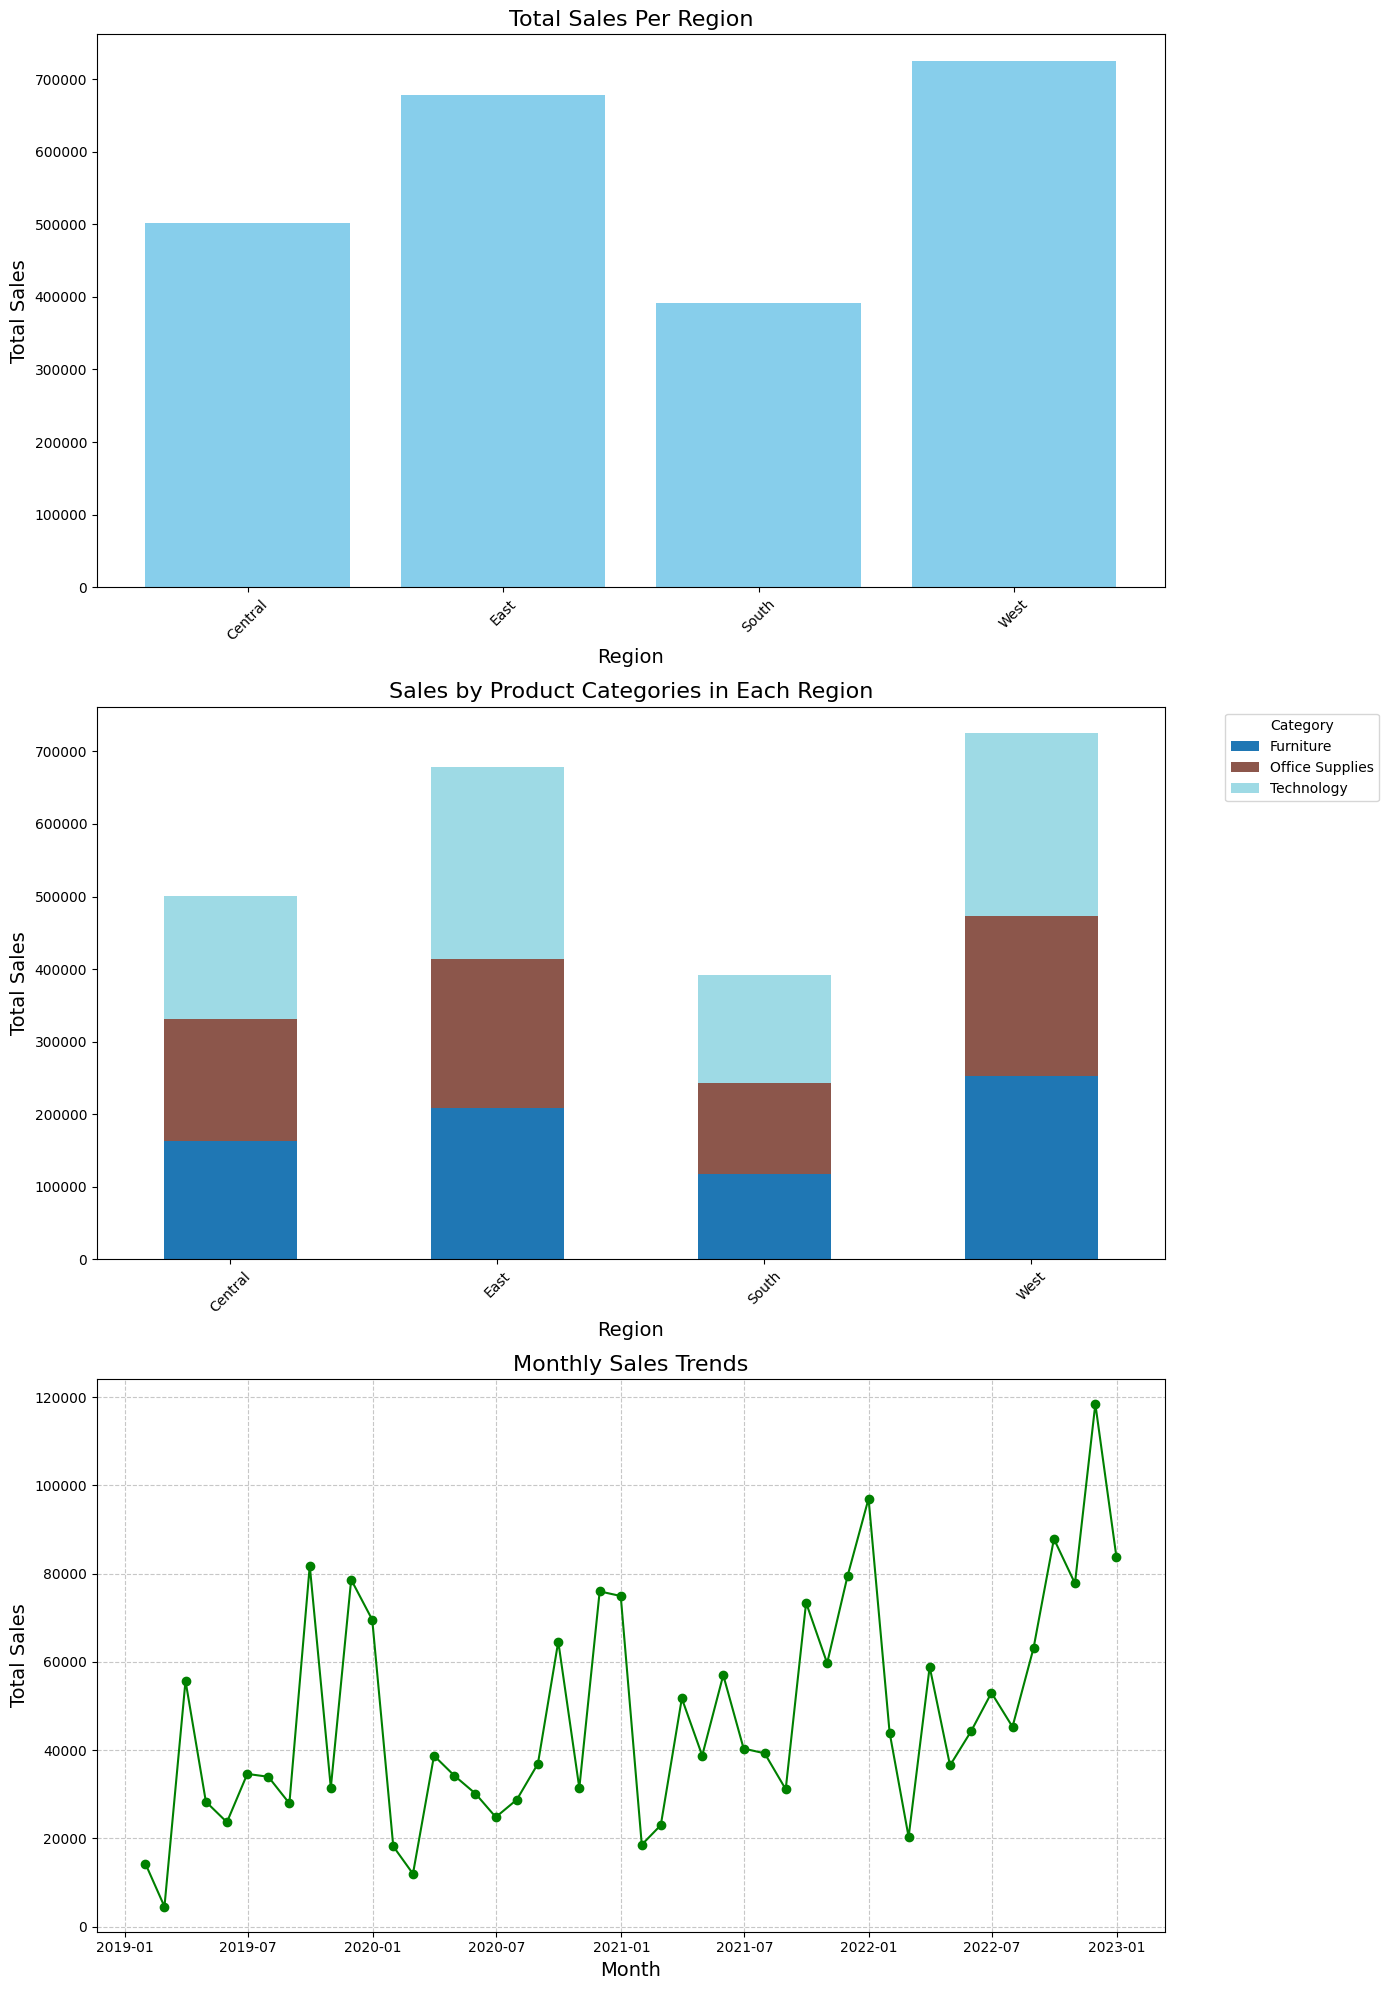

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('salse data.csv', parse_dates=['order_date'])

# Ensure correct column names (if needed)
df.columns = [col.strip() for col in df.columns]

# Prepare data for the plots
# Total sales per region
total_sales_per_region = df.groupby('region')['sales'].sum()

# Sales by product categories in each region
sales_by_category_region = df.groupby(['region', 'category'])['sales'].sum().unstack()

# Monthly sales trends
df['order_date'] = pd.to_datetime(df['order_date'])
monthly_sales_trends = df.resample('ME', on='order_date')['sales'].sum()

# Create the dashboard
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 20))

# Bar chart: Total sales per region
axes[0].bar(total_sales_per_region.index, total_sales_per_region.values, color='skyblue')
axes[0].set_title('Total Sales Per Region', fontsize=16)
axes[0].set_xlabel('Region', fontsize=14)
axes[0].set_ylabel('Total Sales', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)

# Stacked bar chart: Sales by product categories in each region
sales_by_category_region.plot(kind='bar', stacked=True, ax=axes[1], cmap='tab20')
axes[1].set_title('Sales by Product Categories in Each Region', fontsize=16)
axes[1].set_xlabel('Region', fontsize=14)
axes[1].set_ylabel('Total Sales', fontsize=14)
axes[1].legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].tick_params(axis='x', rotation=45)

# Line plot: Monthly sales trends
axes[2].plot(monthly_sales_trends.index, monthly_sales_trends.values, marker='o', linestyle='-', color='green')
axes[2].set_title('Monthly Sales Trends', fontsize=16)
axes[2].set_xlabel('Month', fontsize=14)
axes[2].set_ylabel('Total Sales', fontsize=14)
axes[2].grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
